In [127]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [128]:
# Global
count = 10
length = 15
breadth = int(length*(3/5))

In [129]:
filepath = "/content/SDE - Sheet4.csv"
df = pd.read_csv(filepath)

In [130]:
column_1 = df.iloc[:,0]

In [131]:
new_array = []
categ = []
for i in range(len(column_1)):
  num = column_1[i][1:4]
  cat = column_1[i][6:]
  new_array.append(num)
  categ.append(cat)

In [132]:
print(categ)

['Shape/size error', 'Datatype/format error', 'Shape/size error', 'Shape/size error', 'Shape/size error', 'Others', 'Speed issue', 'Speed issue', 'Memory issue', 'Unexpected result', 'Unexpected result', 'Unexpected result', 'Speed issue', 'Shape/size error', 'Shape/size error', 'Shape/size error', 'Shape/size error', 'Speed issue', 'Unexpected result', 'Memory issue', 'Unexpected result', 'Unexpected result', 'Memory issue', 'Others', 'Others', 'Unexpected result', 'Memory issue', 'Shape/size error', 'Unexpected result', 'Speed issue', 'Speed issue', 'Others', 'Datatype/format error', 'Unexpected result', 'Others', 'Memory issue', 'Unexpected result', 'Unexpected result', 'Others', 'Others', 'Unexpected result', 'Memory issue', 'Unexpected result', 'Shape/size error', 'Unexpected result', 'Unexpected result', 'Memory issue', 'Memory issue', 'Memory issue', 'Speed issue', 'Others', 'Shape/size error', 'Unexpected result', 'Datatype/format error', 'Unexpected result', 'Shape/size error'

In [133]:
for i in set(categ):
  print(i, categ.count(i))

Shape/size error 29
Speed issue 19
Memory issue 12
Unexpected result 44
Datatype/format error 6
Others 14


In [134]:
new_df = pd.DataFrame({"Category": new_array, "Fix": df.iloc[:,1]})
new_df[:5]

,Category,Fix
0,D.1,Repair original model
1,D.2,Fix shape of input/output
2,D.1,Use CPU only
3,D.1,Fix framework installment/version
4,D.1,Fix shape of input/output


In [135]:
# new_df.to_csv("arvind_sde.csv", index=False)

In [136]:
column_1 = new_df.iloc[:,0]
column_2 = new_df.iloc[:,1]

In [137]:
L = len(set(column_1))
column_1[:3]

0    D.1
1    D.2
2    D.1
Name: Category, dtype: object

In [138]:
letter = 'c'
overall_arr = []
for x in set(column_2):
  arr = [0]*L
  for i in range(len(column_2)):
    if(new_df.iloc[:,1][i] == x):
      index = int(new_df.iloc[:,0][i][-1])
      letter = new_df.iloc[:,0][i][-3]
      arr[index-1] += 1
  overall_arr.append([arr, x])

In [139]:
labels = list(set(column_2))
sum_array = []
for i in range(len(overall_arr)):
  sum_array.append([sum(overall_arr[i][0]), labels[i]])

In [140]:
sum_array

[[3, 'Fix tensor shape/size specification'],
 [1, 'Avoid overheating'],
 [24, 'Fix data pre-processing'],
 [8, 'Fix framework installment/version'],
 [9, 'Fix/use quantization'],
 [2, 'Fix conversion API/CLI usage'],
 [20, 'Fix shape of input/output'],
 [6, 'Fix data post-processing'],
 [5, 'GPU delegate'],
 [7, 'Fix API usage during DL integration'],
 [1, 'Clean dependency cache'],
 [1, 'Fix IDE setting'],
 [2, 'Fix file path during DL integration'],
 [4, 'Fix specification of input/output'],
 [14, 'Repair original model'],
 [4, 'Fix thread management'],
 [6, 'Fix memory management'],
 [3, 'Fix datatype of input/output'],
 [1, 'NNAPI delegate'],
 [3, 'Use CPU only']]

In [141]:
sum_array_new = sorted(sum_array)
final_array = [x[1] for x in sum_array_new[-count:]]

In [142]:
final_array

['Fix thread management',
 'GPU delegate',
 'Fix data post-processing',
 'Fix memory management',
 'Fix API usage during DL integration',
 'Fix framework installment/version',
 'Fix/use quantization',
 'Repair original model',
 'Fix shape of input/output',
 'Fix data pre-processing']

In [143]:
sum_array_new

[[1, 'Avoid overheating'],
 [1, 'Clean dependency cache'],
 [1, 'Fix IDE setting'],
 [1, 'NNAPI delegate'],
 [2, 'Fix conversion API/CLI usage'],
 [2, 'Fix file path during DL integration'],
 [3, 'Fix datatype of input/output'],
 [3, 'Fix tensor shape/size specification'],
 [3, 'Use CPU only'],
 [4, 'Fix specification of input/output'],
 [4, 'Fix thread management'],
 [5, 'GPU delegate'],
 [6, 'Fix data post-processing'],
 [6, 'Fix memory management'],
 [7, 'Fix API usage during DL integration'],
 [8, 'Fix framework installment/version'],
 [9, 'Fix/use quantization'],
 [14, 'Repair original model'],
 [20, 'Fix shape of input/output'],
 [24, 'Fix data pre-processing']]

In [144]:
overall_arr_new = []
labels_new = []
for x in final_array:
  for y in range(len(overall_arr)):
    if(overall_arr[y][1] == x):
      z = overall_arr[y]
      overall_arr_new.append(z[0])
      labels_new.append(z[1]+ " (" +str(sum(z[0])) + ")")


overall_arr_new

[[0, 0, 0, 0, 4, 0],
 [0, 0, 0, 0, 5, 0],
 [0, 0, 6, 0, 0, 0],
 [0, 0, 0, 5, 0, 1],
 [0, 0, 3, 2, 0, 2],
 [2, 0, 3, 2, 0, 1],
 [0, 0, 3, 0, 5, 1],
 [6, 0, 5, 0, 2, 1],
 [17, 2, 1, 0, 0, 0],
 [1, 2, 17, 0, 1, 3]]

In [145]:
def plot_confusion_matrix(cm,x_axis_names, y_axis_names,title='Confusion matrix',cmap=None,normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(length, breadth))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if x_axis_names is not None:
        tick_marks_x = np.arange(len(x_axis_names))
        plt.xticks(tick_marks_x, x_axis_names)
    if y_axis_names is not None:
        tick_marks_y = np.arange(len(y_axis_names))
        plt.yticks(tick_marks_y, y_axis_names)

    plt.tight_layout()
    plt.show()

In [146]:
x_axis = []
for i in range(L):
  temp_str = letter + "." + str(i+1)
  x_axis.append(temp_str)

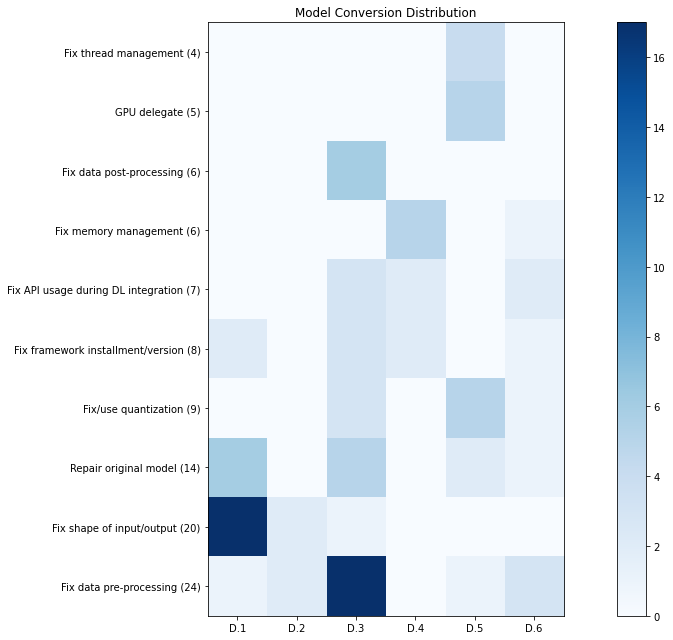

In [147]:
plot_confusion_matrix(cm = np.array(overall_arr_new), normalize = False, x_axis_names = x_axis, y_axis_names = labels_new,title = "Model Conversion Distribution")